<a href="https://colab.research.google.com/github/aleksejalex/expert-octo-eureka/blob/main/RADcv_Assignment_3_Gaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. zápočtová úloha z 01RAD

## Popis úlohy

Datový soubor vychází z datasetu \texttt{House Sales in King County, USA}, který je k nalezení například na kaggle.com, nebo v knihovně \texttt{library(moderndive)} data \texttt{house\_prices}.
Původní dataset obsahuje prodejní ceny domů v oblasti King County, která obsahuje i město Seattle, a data byla nasbírána mezi květnem 2014 a květnem 2015. Pro naše potřeby bylo z datasetu vypuštěno jak několik proměnných, také byl dataset výrazně osekán a lehce modifikován.

Dále byl dataset již dopředu rozdělen na tři části, které všechny postupně v rámci 3. zápočtové úlohy využijete.


In [ ]:
#library(tidyverse)

In [ ]:
#house_rad <- read.table("https://raw.githubusercontent.com/francji1/01RAD/main/data/01RAD2022_house.csv",header=TRUE,sep=",")
#head(house_rad)

Data celkem obsahují  následujících 18 proměnných, přičemž naším cílem je prozkoumat vliv 12 z nich na cenu nemovitostí   * price}. Přičemž anglický popis jednotlivých proměnných (sloupců) je následující:

Feature & Description
 
  * id  : Our notation for a house  
 
  * price  : Price is prediction target  
 
  * bedrooms  : Number of Bedrooms/House  
 
  * bathrooms  : Number of Bathrooms/Bedrooms  
 
  * sqft\_living  : Square footage of the home  
 
  * sqft\_lot  : Square footage of the lot   
 
  * floors  :  Total floors (levels) in house 
 
  * waterfront  : House which has a view to a waterfront   
 
  * view  : Has been viewed  
 
  * condition  : How good the condition is Overall  
 
  * grade  : Overall grade given to the housing unit 
 
  * sqft\_above  : Square footage of house apart from basement   
 
  * sqft\_basement  : Square footage of the basement   
 
  * yr\_built  : Built Year   
 
  * yr\_renovated  : Year when house was renovated  
 
  * sqft\_living15  : Living room area in 2015 (implies– some renovations) 
 
  * sqft\_lot15  : lotSize area in 2015 (implies– some renovations)  
 
  * split  : Splitting variable with train, test and validation sample  


## Podmínky a body

Úkol i protokol vypracujte samostatně. Pokud na řešení nějaké úlohy budete přesto s někým spolupracovat, radit se, nezapomeňte to u odpovědi na danou otázku uvést. Tato zápočtová úloha obsahuje 10 otázek po 1 bodu. Celkem za 3 zápočtové úlohy bude možné získat 30 bodů, přičemž pro získání zápočtu je potřeba 20. Další dodatečné body mohu případně individuálně udělit za řešení mini domácích úkolů z jednotlivých hodin.

## Odevzdání

Protokol ve formátu pdf (včetně příslušného Rmd souboru) odevzdejte prostřednictvím MS Teams, nejpozději do 12:00 dne 5. 1. 2023.


In [2]:
# importy balicku
import inspect
import numpy as np
import pandas as pd
import seaborn as sbn
import csv
import matplotlib as mpt
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt



def retrieve_name(var):
    "vrati nazev promenne jako string"
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

examplevarr = 4
print(examplevarr)
print(retrieve_name(examplevarr))

def gauss(x, mi, sigma2):
    "hustota normalniho rozdeleni. x je bud cislo nebo np.array"
    return (1/(np.sqrt(2*np.pi*sigma2)) * np.exp (-  ( (x-mi)**2 ) / (2*sigma2) ) )


4
['examplevarr']


In [3]:
# additional settings for plotting images:
plt.rcParams.update({"figure.dpi": 130})   # increase DPI, default = 96
#%config InlineBackend.figure_format = "svg"  # every plot (matplotlib's or seaborn's) must be a SVG image

In [4]:
# import datasetu (pomoci Pandas)
# (puvodne dataset byl stazen z >>    )
url = "https://raw.githubusercontent.com/francji1/01RAD/main/data/01RAD2022_house.csv"
imported_data = pd.read_csv(url)

imported_data
#data.info

Unnamed: 0    id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0              1     1  2395000.0         4       3.25         3800     19798   
1              2     2   679000.0         3       2.50         2770      9350   
2              3     3   664000.0         2       1.75         1720      5785   
3              4     4   915000.0         5       2.50         2750      5589   
4              5     5   450000.0         5       2.50         2850    209523   
...          ...   ...        ...       ...        ...          ...       ...   
1995        1996  1996   512031.0         3       1.75         1540      3000   
1996        1997  1997   270000.0         4       2.50         1660      8063   
1997        1998  1998   875000.0         3       2.50         1690     10592   
1998        1999  1999   415000.0         2       1.00          880      4558   
1999        2000  2000   645000.0         3       1.75         2270     11472   

      floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0        2.0           0     0          3     10        3800              0   
1        2.0           0     3          3      8        2770              0   
2        1.0           0     0          3      6         860            860   
3        1.5           0     0          5      9        1840            910   
4        1.0           0     0          4      7        1930            920   
...      ...         ...   ...        ...    ...         ...            ...   
1995     1.0           0     2          3      7         770            770   
1996     1.0           0     0          4      7        1660              0   
1997     1.0           0     0          3      8        1690              0   
1998     1.0           0     0          3      7         880              0   
1999     1.0           0     0          4      7        1370            900   

      yr_built  yr_renovated  sqft_living15  sqft_lot15       split  
0         1969          2009           3940       18975       train  
1         1957          2000           2660        9695       train  
2         1948          2002           1680        5184       train  
3         1910             0           1460        4250       train  
4         1925          1968           2220      209523       train  
...        ...           ...            ...         ...         ...  
1995      1920             0           1420        4200  validation  
1996      1978             0           1060        8437  validation  
1997      1973          2009           2260        9945  validation  
1998      1951             0           1370        5243  validation  
1999      1956             0           2270        8340  validation  

[2000 rows x 19 columns]

## Průzkumová a grafická část:

* Otázka 01

  Ověřte rozměry datového souboru, typy jednotlivých proměnných,  a shrňte základní popisné charakteristiky všech proměnných. Vykreslete histogram a odhad hustoty pro odezvu   * price}, dá se z toho již něco odvozovat pro budoucí analýzu?
  
  \

In [5]:
# zakladni charakteristiky
imported_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2000 non-null   int64  
 1   id             2000 non-null   int64  
 2   price          2000 non-null   float64
 3   bedrooms       2000 non-null   int64  
 4   bathrooms      2000 non-null   float64
 5   sqft_living    2000 non-null   int64  
 6   sqft_lot       2000 non-null   int64  
 7   floors         2000 non-null   float64
 8   waterfront     2000 non-null   int64  
 9   view           2000 non-null   int64  
 10  condition      2000 non-null   int64  
 11  grade          2000 non-null   int64  
 12  sqft_above     2000 non-null   int64  
 13  sqft_basement  2000 non-null   int64  
 14  yr_built       2000 non-null   int64  
 15  yr_renovated   2000 non-null   int64  
 16  sqft_living15  2000 non-null   int64  
 17  sqft_lot15     2000 non-null   int64  
 18  split   

In [6]:
imported_data.describe()

Unnamed: 0           id         price     bedrooms    bathrooms  \
count  2000.000000  2000.000000  2.000000e+03  2000.000000  2000.000000   
mean   1000.500000  1000.500000  6.315752e+05     3.414500     2.179875   
std     577.494589   577.494589  5.108879e+05     0.864328     0.780853   
min       1.000000     1.000000  8.400000e+04     2.000000     1.000000   
25%     500.750000   500.750000  3.478375e+05     3.000000     1.750000   
50%    1000.500000  1000.500000  5.015000e+05     3.000000     2.250000   
75%    1500.250000  1500.250000  7.500000e+05     4.000000     2.500000   
max    2000.000000  2000.000000  8.500000e+06     6.000000     4.750000   

        sqft_living       sqft_lot       floors  waterfront         view  \
count   2000.000000    2000.000000  2000.000000  2000.00000  2000.000000   
mean    2151.140500   16047.752500     1.499000     0.02100     0.368000   
std      927.698389   38345.913723     0.517574     0.14342     0.964905   
min      105.000000     690.000000     1.000000     0.00000     0.000000   
25%     1490.000000    5040.000000     1.000000     0.00000     0.000000   
50%     1980.000000    7689.000000     1.500000     0.00000     0.000000   
75%     2680.000000   11340.500000     2.000000     0.00000     0.000000   
max    10040.000000  641203.000000     3.000000     1.00000     4.000000   

        condition       grade   sqft_above  sqft_basement     yr_built  \
count  2000.00000  2000.00000  2000.000000    2000.000000  2000.000000   
mean      3.33400     8.14000  1821.908500     333.741000  1958.034000   
std       0.62661     8.83133   809.921498     457.855832    30.729904   
min       1.00000     4.00000   580.000000       0.000000  1900.000000   
25%       3.00000     7.00000  1230.000000       0.000000  1936.000000   
50%       3.00000     7.00000  1650.000000       0.000000  1957.000000   
75%       4.00000     8.00000  2211.500000     672.500000  1981.000000   
max       5.00000   232.00000  7680.000000    2360.000000  2015.000000   

       yr_renovated  sqft_living15   sqft_lot15  
count   2000.000000    2000.000000    2000.0000  
mean     879.246000    1966.679000   13062.7490  
std      991.218107     681.426679   25147.8105  
min        0.000000     780.000000    1023.0000  
25%        0.000000    1480.000000    5100.0000  
50%        0.000000    1830.000000    7632.0000  
75%     1996.000000    2320.000000   10451.0000  
max     2015.000000    5790.000000  310582.0000

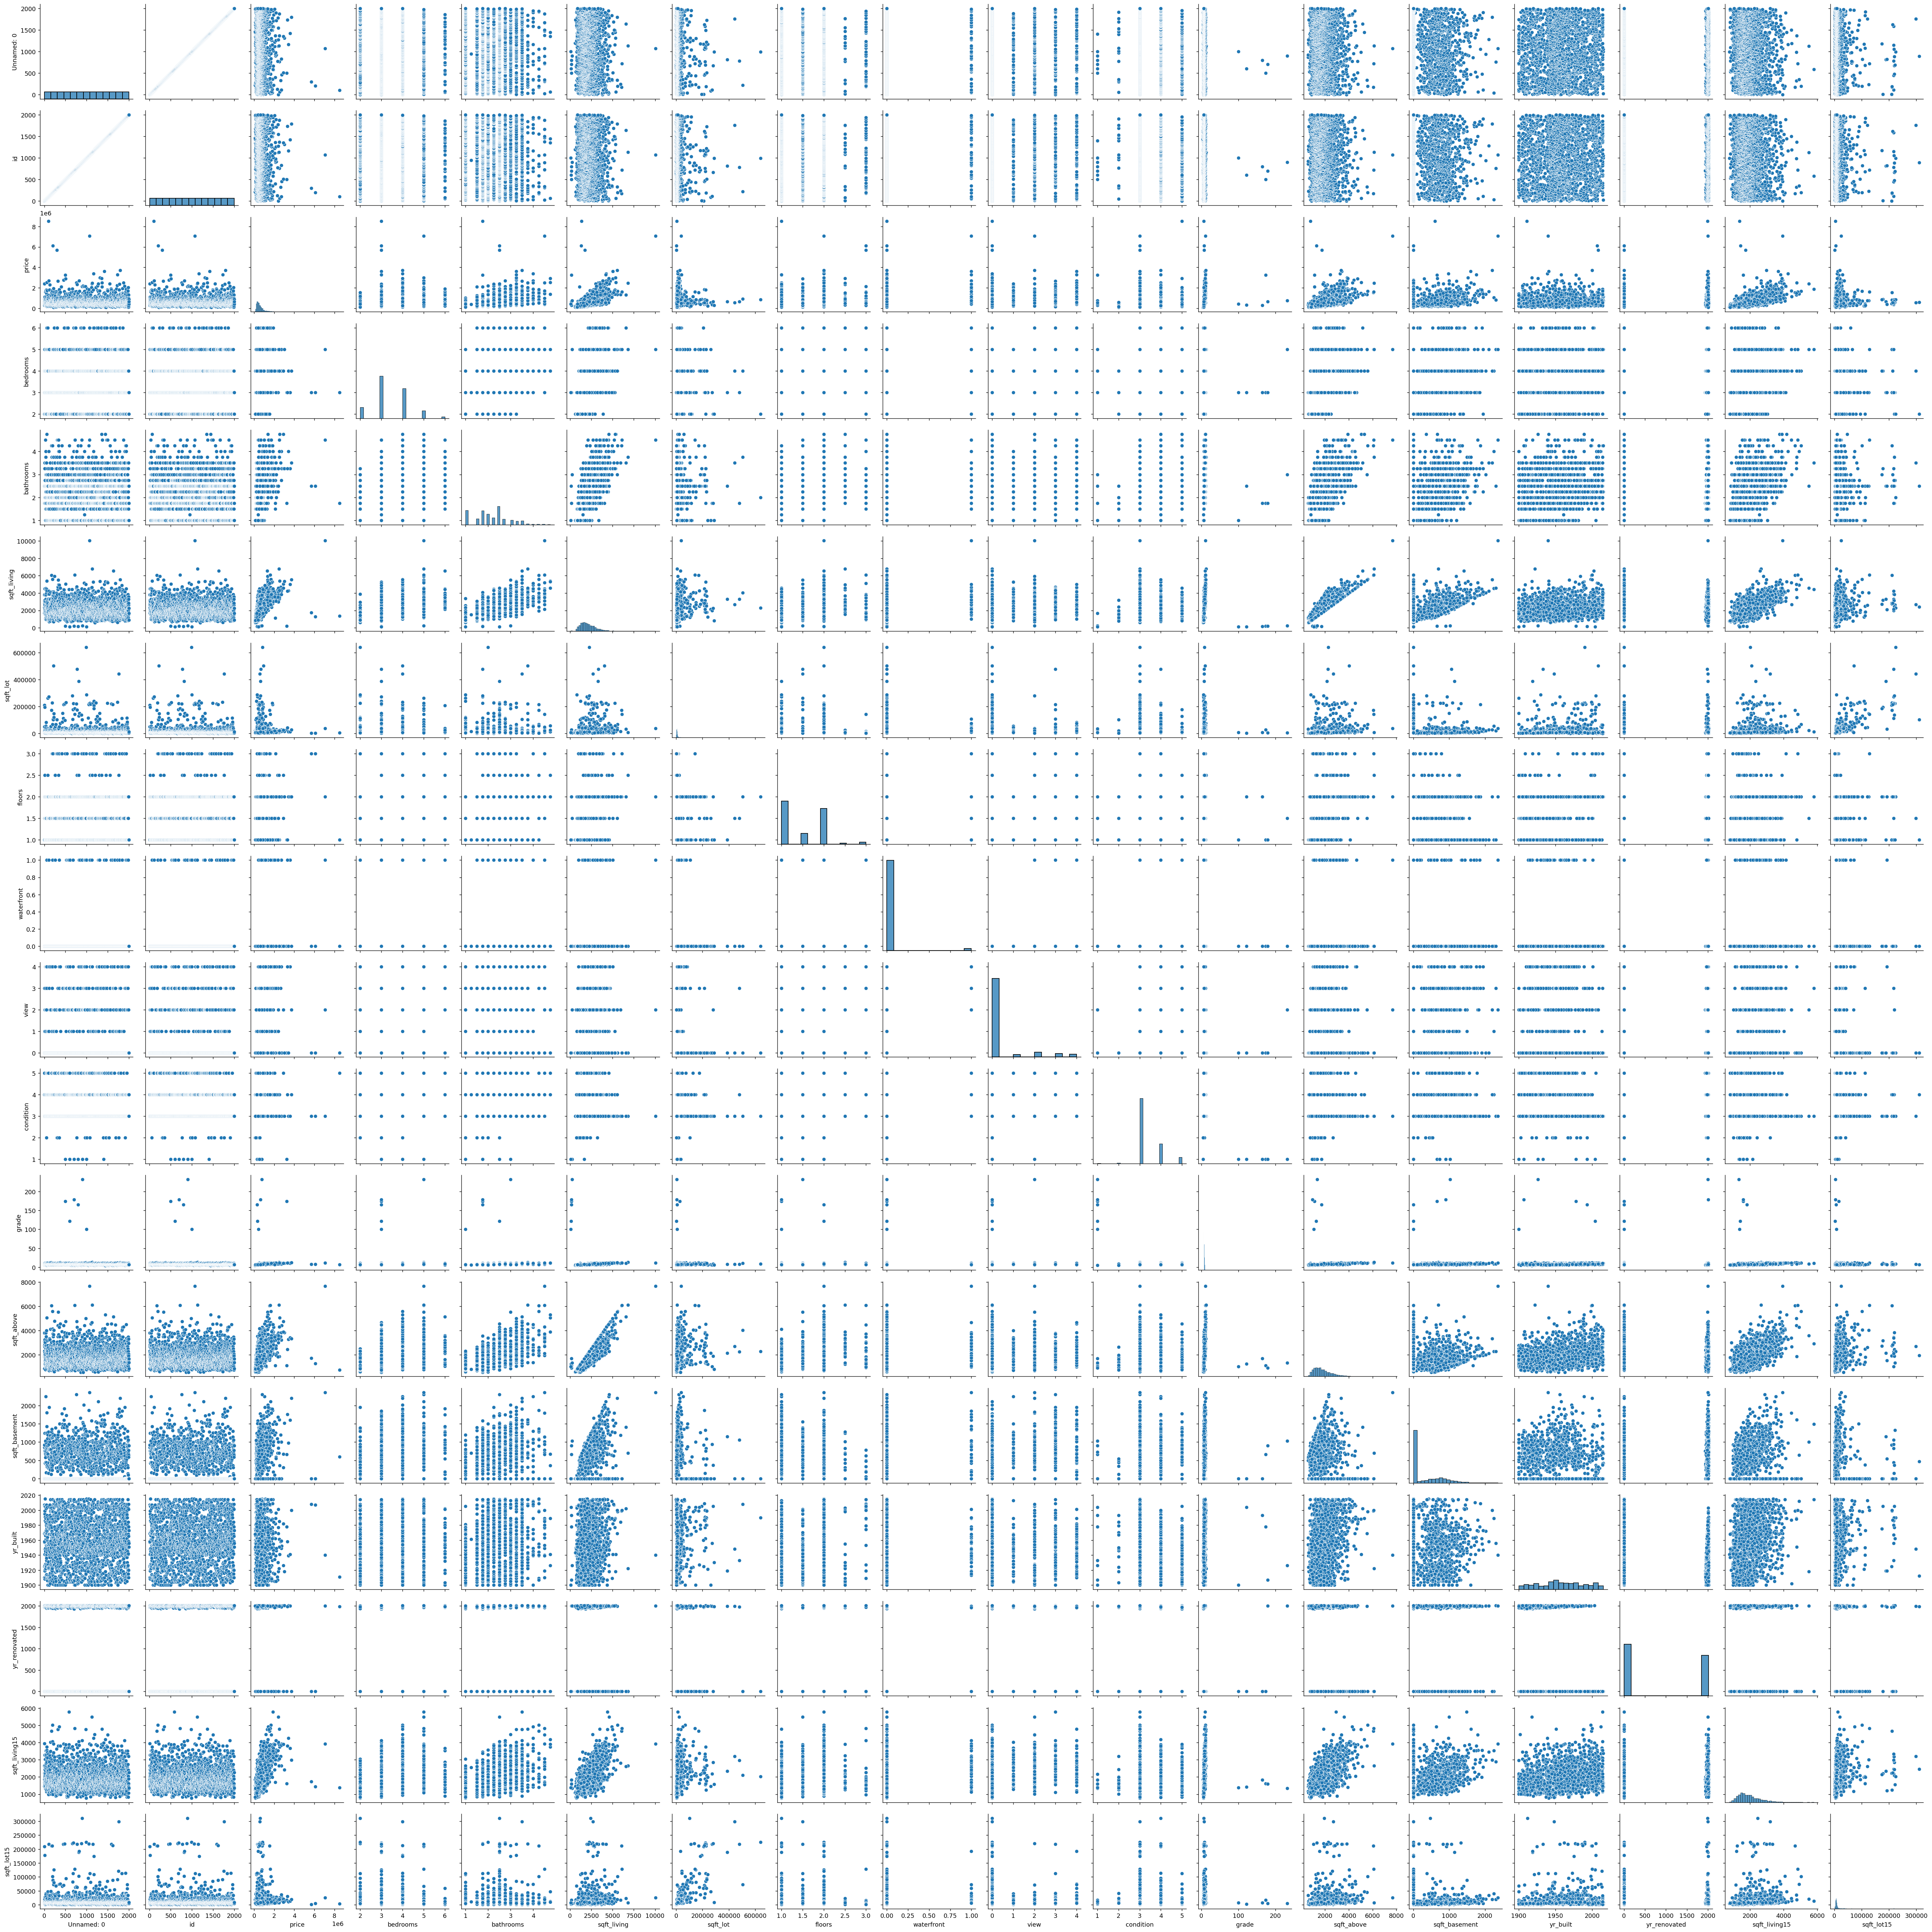

In [6]:
# zakladni vizualizace
sbn.pairplot(imported_data)

In [14]:
print(imported_data.describe())
print(imported_data.columns)

print(len(  imported_data[imported_data.split == 'train']  ))
print(len(  imported_data[imported_data.split == 'train']  ))

        Unnamed: 0           id         price     bedrooms    bathrooms  \
count  2000.000000  2000.000000  2.000000e+03  2000.000000  2000.000000   
mean   1000.500000  1000.500000  6.315752e+05     3.414500     2.179875   
std     577.494589   577.494589  5.108879e+05     0.864328     0.780853   
min       1.000000     1.000000  8.400000e+04     2.000000     1.000000   
25%     500.750000   500.750000  3.478375e+05     3.000000     1.750000   
50%    1000.500000  1000.500000  5.015000e+05     3.000000     2.250000   
75%    1500.250000  1500.250000  7.500000e+05     4.000000     2.500000   
max    2000.000000  2000.000000  8.500000e+06     6.000000     4.750000   

        sqft_living       sqft_lot       floors  waterfront         view  \
count   2000.000000    2000.000000  2000.000000  2000.00000  2000.000000   
mean    2151.140500   16047.752500     1.499000     0.02100     0.368000   
std      927.698389   38345.913723     0.517574     0.14342     0.964905   
min      105.000000 

In [15]:
import numpy as np
import scipy as scp

print(scp.pi)

3.141592653589793


* Otázka 02

  Jsou všechny proměnné použitelné pro analýzu a predikci ceny nemovitostí? Pokud data obsahují chybějící hodnoty, (případně nesmyslné hodnoty), lze je nějak nahradit (upravit), nebo musíme data odstranit?
  
  \

In [17]:
data = imported_data

In [18]:
# kontrola na nan-y
nan_in_data = data.isnull().sum().sum()
print('Number of NaN values in dataframe: ' + str(nan_in_data))

Number of NaN values in dataframe: 0


* Otázka 03
 
  Zkontrolujte pro 4 vybranné proměnné (price, sqft_living, grade, yr_built) bylo-li rozdělení datasetu pomocí proměnné split náhodné. Tj mají zmíněné proměnné ve skupinách train, test a validation přibližně stejné rozdělení?

\

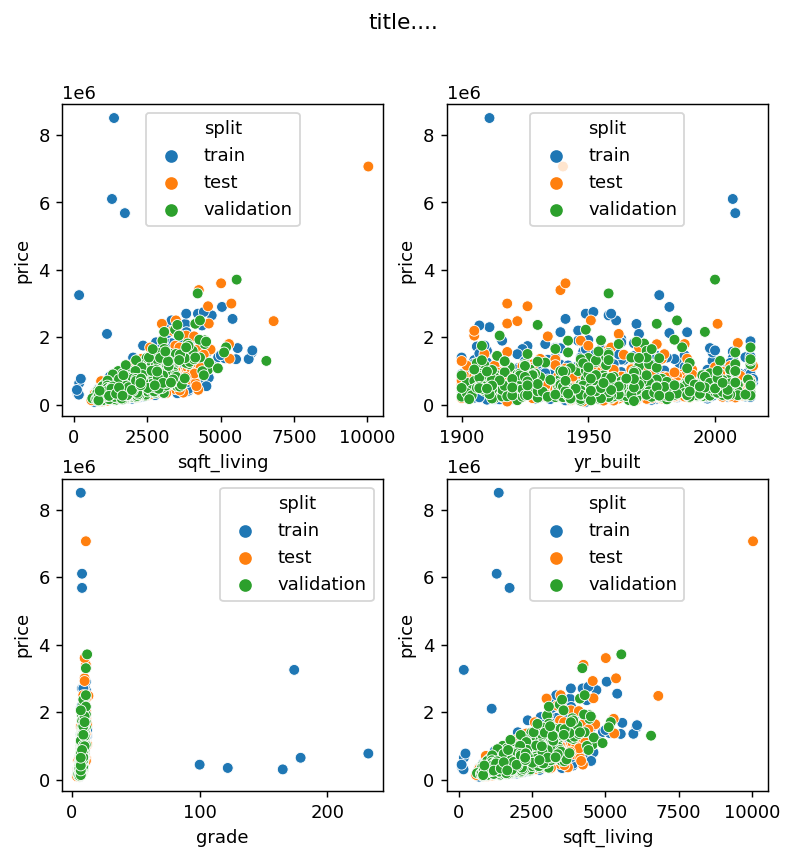

In [27]:
# vykreslit 4 subploty, v kazdem scatterplot o trech barvach

fig, axs = plt.subplots(2, 2, figsize =(7, 7))
sbn.scatterplot( x = "sqft_living", y = "price", hue = "split", data = data , ax = axs[0,0])
sbn.scatterplot( x = "grade", y = "price", hue = "split", data = data , ax = axs[1,0])
sbn.scatterplot( x = "yr_built", y = "price", hue = "split", data = data , ax = axs[0,1])
sbn.scatterplot( x = "sqft_living", y = "price", hue = "split", data = data , ax = axs[1,1])

fig.suptitle("title....")
fig.show()

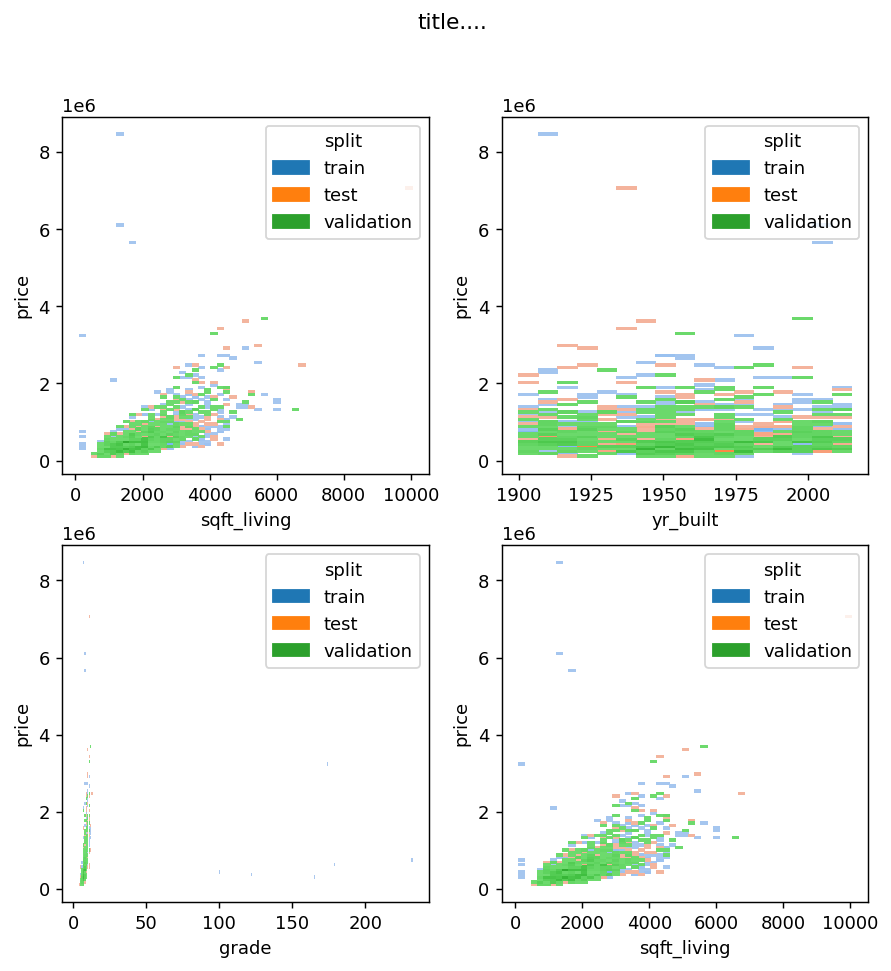

In [32]:
# vykreslit 4 subploty, v kazdem histplot o trech barvach

fig, axs = plt.subplots(2, 2, figsize =(8, 8))
sbn.histplot( x = "sqft_living", y = "price", hue = "split", data = data , kde = True , ax = axs[0,0])
sbn.histplot( x = "grade", y = "price", hue = "split", data = data , ax = axs[1,0])
sbn.histplot( x = "yr_built", y = "price", hue = "split", data = data , ax = axs[0,1])
sbn.histplot( x = "sqft_living", y = "price", hue = "split", data = data , ax = axs[1,1])

fig.suptitle("title....")
fig.show()

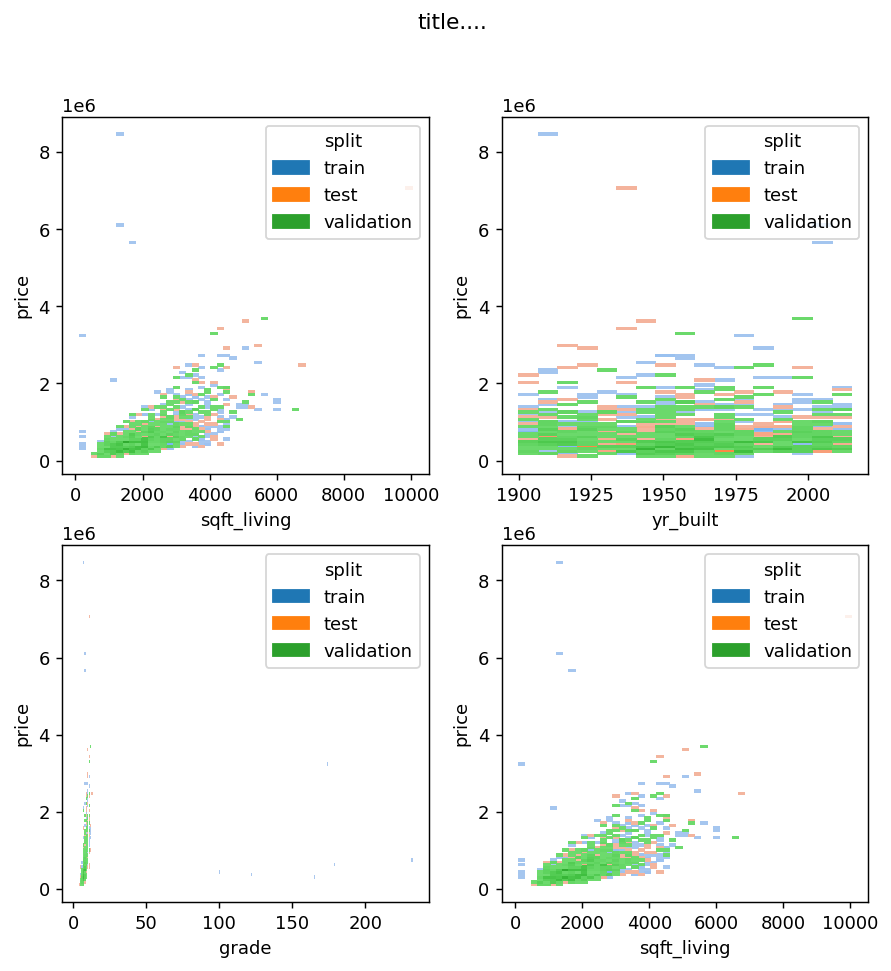

In [34]:
# vykreslit 4 subploty, v kazdem histplot o trech barvach

fig, axs = plt.subplots(2, 2, figsize =(8, 8))
sbn.histplot( x = "sqft_living", y = "price", hue = "split", data = data  , ax = axs[0,0])
sbn.histplot( x = "grade", y = "price", hue = "split", data = data , ax = axs[1,0])
sbn.histplot( x = "yr_built", y = "price", hue = "split", data = data , ax = axs[0,1])
sbn.histplot( x = "sqft_living", y = "price", hue = "split", data = data , ax = axs[1,1])

fig.suptitle("title....")
fig.show()

## Lineární model (použijte pouze trénovací data, tj. split == "train"):

* Otázka 04

  Spočtěte korelace mezi jednotlivými regressory a graficky je znázorněte. Dále spočtěte číso podmmíněnosti matice regresorů Kappa a VIF. Pokud se v datech vyskytuje znatelná multicollinearita, rozhodněte jaké proměnné a proč použijete v následném linárním modelu.


* Otázka 05
    
  Pouze pomocí trénovacích dat (tj., split == "train") a všech vybranných proměnných najděte vhodný lineární regresní model, který má za úkol predikovat co nejlépe cenu, tj. minimalizovat střední kvadratickou chybu (MSE). U výsledného modelu porovnejte VIF a Kappa s původní celkovou maticí regresorů.
  



* Otázka 06

   Pro Vámi vybraný model z předešlé otázky spočtěte příslušné infulenční míry. Uveďtě id pro 20 pozorování s největší hodnotou DIFF, největší hodnotou leverage (hatvalues) a největší hodnotou Cookovy vzdálenosti. (tj, 3 krát 20 hodnot). Jaká pozorování považujete za vlivná a odlehlá pozorování.


* Otázka 07

  Validujte model pomocí grafického znázornění reziduí (Residual vs Fitted, QQ-plot, Cookova vzdálenost, Leverages, ...).
  Identifikovali jste na základě této a předchozí otázky v datech nějaká podezřelá pozorování, která mohla vzniknout při úpravě (přepisu) datasetu? Doporučili byste tato pozorování z dat odstranit?

## Train, test, validation ...:  (možno vynechat pokud si jste jisti počtem bodů na zápočet)

* Otázka 08

  Pokud jste se rozhodli z dat odstranit nějaká pozorování, tak dále pracujtes s vyfiltrovaným datasetem a přetrénujte model z otázky 5. A spočtěte pro tento model $R^2$ statistiku a MSE jak na trénovacích tak testovacích datech (split == "test"). 

* Otázka 09

  Pomocí hřebenové regrese (případně pomocí LASSO a Elastic Net) zkuste najít nejlepší hyperparametr(y) tak, aby výsledný model měl co nejmenší MSE na testovacích datech.  

* Otázka 10

  Vyberte výsledný model a porovnejte MSE a $R^2$ na trénovacích, testovacích a validačních datech. Co z těchto hodnot usuzujete o kvalitě modelu a případném přetrénování? Je váš model vhodný pro predikci cen nemovitostí v okolí King County? Pokud ano, má tato predikce nějaká omezeni?